In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Parte 1: Exploración y Visualización de Datos (EDA)

### 1. Carga y Exploración Inicial de Datos:
* Cargar el dataset y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.

In [4]:
ruta = '../data/retail_sales_dataset.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


* Transaction ID: Identificador único de la transacción.
* Date: Fecha de la transacción.
* Customer ID: Identificador único del cliente.
* Gender: Género del cliente.
* Age: Edad del cliente.
* Product Category: Categoría del producto comprado.
* Quantity: Cantidad de productos comprados.
* Price per Unit: Precio por unidad del producto.
* Total Amount: Total gastado por el cliente en la transacción.

In [7]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
# Función para detectar outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites inferiores y superiores para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

# Identificar outliers para las columnas relevantes
outliers_age = detectar_outliers(df, 'Age')
outliers_quantity = detectar_outliers(df, 'Quantity')
outliers_price = detectar_outliers(df, 'Price per Unit')
outliers_total_amount = detectar_outliers(df, 'Total Amount')

print(f'Outliers en Age:\n{outliers_age}\n')
print(f'Outliers en Quantity:\n{outliers_quantity}\n')
print(f'Outliers en Price per Unit:\n{outliers_price}\n')
print(f'Outliers en Total Amount:\n{outliers_total_amount}\n')

Outliers en Age:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []

Outliers en Quantity:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []

Outliers en Price per Unit:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []

Outliers en Total Amount:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []



### 2. Análisis de Correlación:
* Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

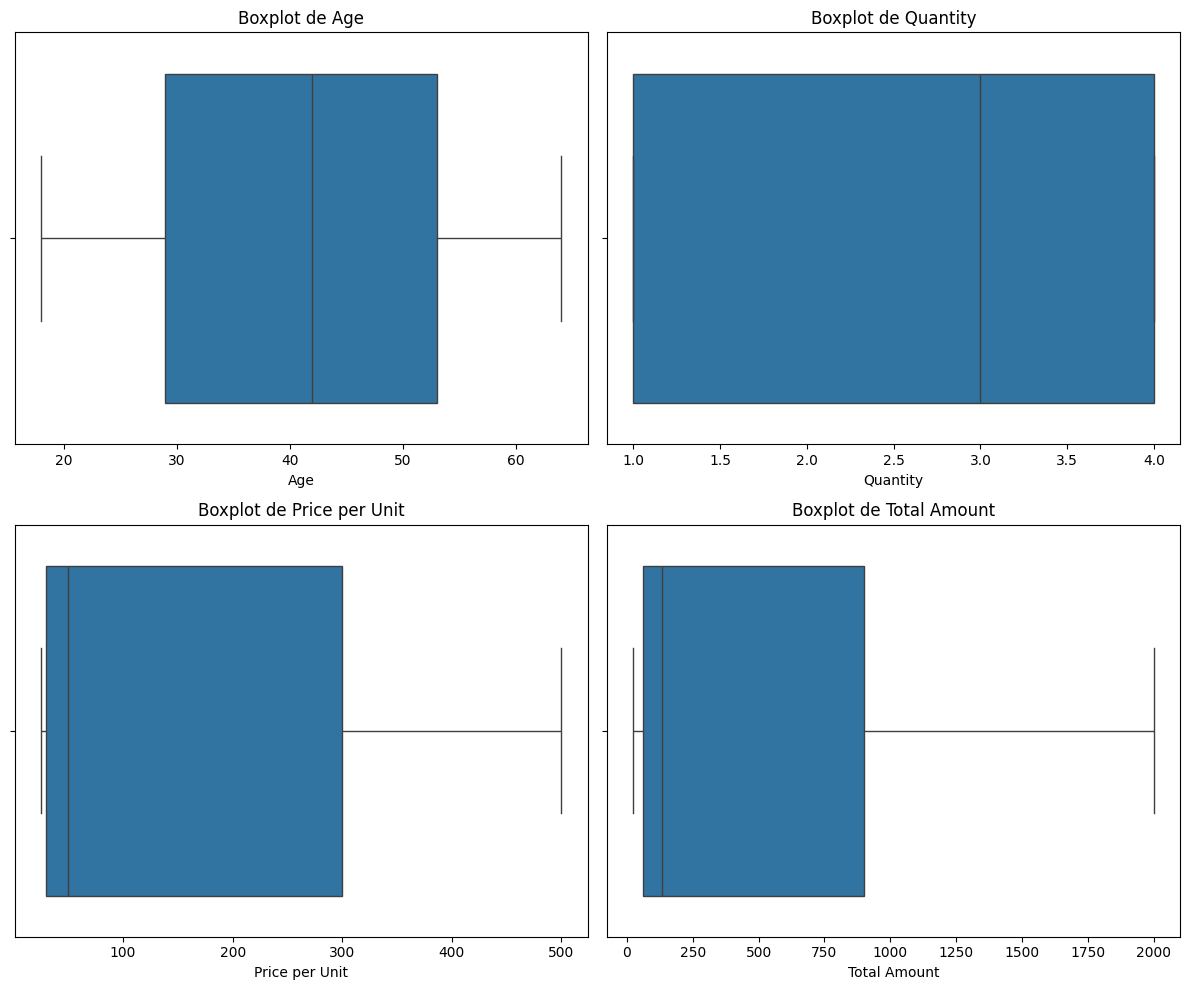

In [11]:
# Graficar boxplots para cada columna numérica
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de Age')

sns.boxplot(x=df['Quantity'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Quantity')

sns.boxplot(x=df['Price per Unit'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Price per Unit')

sns.boxplot(x=df['Total Amount'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Total Amount')

plt.tight_layout()
plt.show()

In [18]:
# Calcular los cuartiles Q1 y Q3 para la columna 'Total Amount'
Q1 = df['Total Amount'].quantile(0.25)
Q3 = df['Total Amount'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminar outliers en Total Amount usando los límites calculados
df_sin_outliers = df[(df['Total Amount'] >= limite_inferior) & (df['Total Amount'] <= limite_superior)]
# Verificar cuántas filas han quedado después de eliminar los outliers
print(f"Filas antes: {len(df)}")
print(f"Filas después: {len(df_sin_outliers)}")

Filas antes: 1000
Filas después: 1000


In [20]:
# Calcular los cuartiles Q1 y Q3 para la columna 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Calcular los límites inferior y superior
limite_inferior_age = Q1_age - 1.5 * IQR_age
limite_superior_age = Q3_age + 1.5 * IQR_age

# Filtrar el DataFrame para eliminar los outliers en 'Age'
df_sin_outliers_age = df[(df['Age'] >= limite_inferior_age) & (df['Age'] <= limite_superior_age)]
print(f"Filas antes: {len(df)}")
print(f"Filas después: {len(df_sin_outliers_age)}")

Filas antes: 1000
Filas después: 1000


In [21]:
# Calcular la matriz de correlación
correlation_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


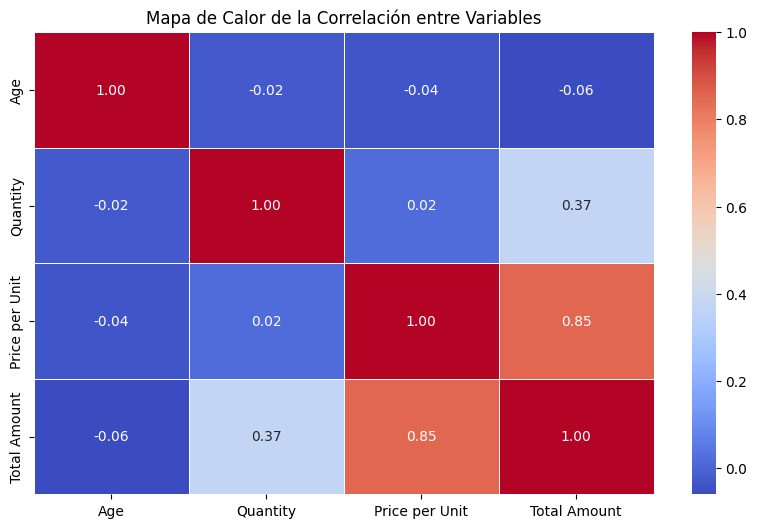

In [22]:
# Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Agregar título y mostrar el gráfico
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

### 3. Visualización de Datos:
* Crear subplots para comparar diferentes variables clave.
* Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

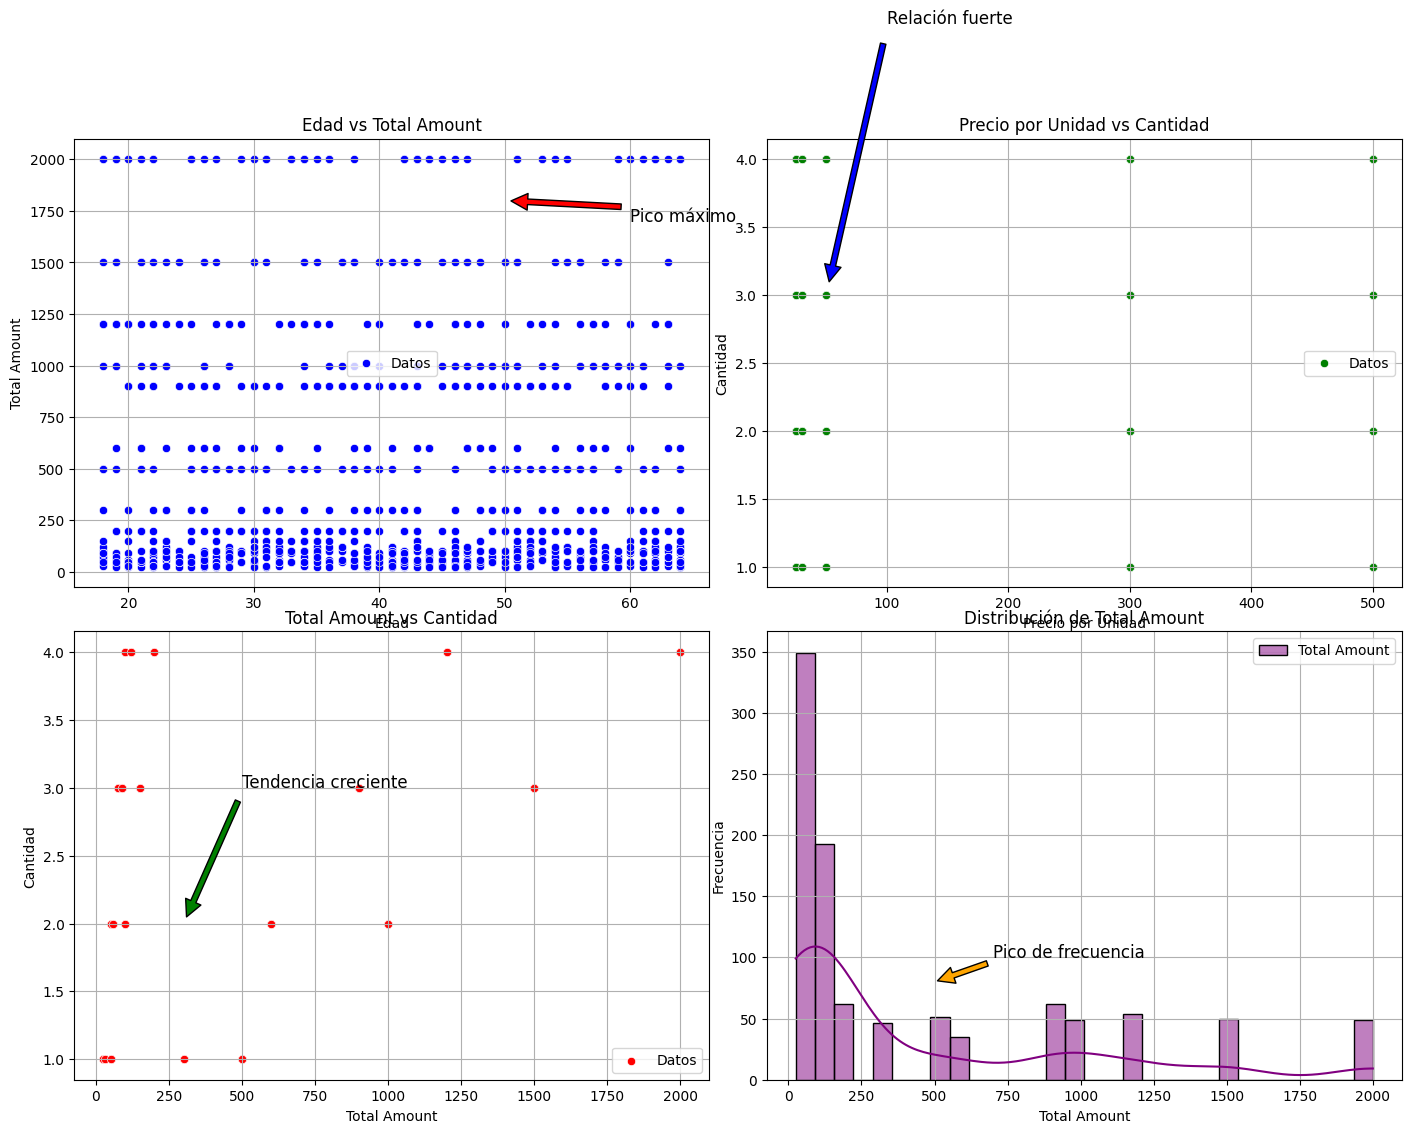

In [27]:
# Crear subplots: 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Ajustar el espacio entre los subplots
plt.tight_layout()

# 1. Scatterplot entre 'Age' y 'Total Amount'
sns.scatterplot(data=df, x='Age', y='Total Amount', ax=axes[0, 0], color='b', label='Datos')
axes[0, 0].set_title('Edad vs Total Amount')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Total Amount')
axes[0, 0].grid(True)  # Activar cuadrículas
axes[0, 0].legend()  # Añadir leyenda

# Anotación y flecha
axes[0, 0].annotate('Pico máximo', xy=(50, 1800), xytext=(60, 1700),
                    arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='black')

# 2. Scatterplot entre 'Price per Unit' y 'Quantity'
sns.scatterplot(data=df, x='Price per Unit', y='Quantity', ax=axes[0, 1], color='g', label='Datos')
axes[0, 1].set_title('Precio por Unidad vs Cantidad')
axes[0, 1].set_xlabel('Precio por Unidad')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].grid(True)  # Activar cuadrículas
axes[0, 1].legend()  # Añadir leyenda

# Anotación y flecha
axes[0, 1].annotate('Relación fuerte', xy=(50, 3), xytext=(100, 5),
                    arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='black')

# 3. Scatterplot entre 'Total Amount' y 'Quantity'
sns.scatterplot(data=df, x='Total Amount', y='Quantity', ax=axes[1, 0], color='r', label='Datos')
axes[1, 0].set_title('Total Amount vs Cantidad')
axes[1, 0].set_xlabel('Total Amount')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].grid(True)  # Activar cuadrículas
axes[1, 0].legend()  # Añadir leyenda

# Anotación y flecha
axes[1, 0].annotate('Tendencia creciente', xy=(300, 2), xytext=(500, 3),
                    arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color='black')

# 4. Histograma de 'Total Amount' (última celda vacía para el histograma)
sns.histplot(df['Total Amount'], bins=30, kde=True, ax=axes[1, 1], color='purple', label='Total Amount')
axes[1, 1].set_title('Distribución de Total Amount')
axes[1, 1].set_xlabel('Total Amount')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].grid(True)  # Activar cuadrículas
axes[1, 1].legend()  # Añadir leyenda

# Anotación sobre el pico en el histograma
axes[1, 1].annotate('Pico de frecuencia', xy=(500, 80), xytext=(700, 100),
                    arrowprops=dict(facecolor='orange', shrink=0.05), fontsize=12, color='black')

# Mostrar los gráficos
plt.show()